# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

# Trends


In [38]:
pprint("1. From the Latitude vs Temperature plot it is evident that the closer one is the equator the hotter on average the temperature will be. As you move away from the equator, particularly in the northern hemisphere, the temperature gets colder")
pprint("2. Due to the absence of cities in the southern regions of the southern hemisphere it is hard to observe trends in this region. The lack of strong relationship between latitude in the southern hemisphere and wind speed, cloudiness etc. indicates that there could be more variation in the southern hemisphere in terms of weather which may be due to the fact that more of the southern hemisphere is covered by ocean rather than land")
pprint("3. If one is looking for cities to live with a low humidity level then the best option is cities around the latitude of 20 degrees, shown in the Latitude vs. Humidity Plot")

('1. From the Latitude vs Temperature plot it is evident that the closer one '
 'is the equator the hotter on average the temperature will be. As you move '
 'away from the equator, particularly in the northern hemisphere, the '
 'temperature gets colder')
('2. Due to the absence of cities in the southern regions of the southern '
 'hemisphere it is hard to observe trends in this region. The lack of strong '
 'relationship between latitude in the southern hemisphere and wind speed, '
 'cloudiness etc. indicates that there could be more variation in the southern '
 'hemisphere in terms of weather which may be due to the fact that more of the '
 'southern hemisphere is covered by ocean rather than land')
('3. If one is looking for cities to live with a low humidity level then the '
 'best option is cities around the latitude of 20 degrees, shown in the '
 'Latitude vs. Humidity Plot')


In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from scipy import stats
import json
import requests
import random
from datetime import datetime
from pprint import pprint
import numpy as np
from citipy import citipy
from api_keys import weather_api_key
weather_api_key

'8c39d6a97ca0e33b9fc5fbc22b9f31f0'

## Generate Cities List

In [2]:
long = []
lat = []

for x in np.random.randint(-179.5,180,5000):
    long.append(x)
for x in np.random.randint(-89.5,90,5000):
    lat.append(x)
    
lat_long = zip(long, lat)

cities = []
country_code = []

for lat,long in lat_long:
    city = citipy.nearest_city(lat,long)
    city_name = city.city_name
    cities.append(city_name)
    c_code = city.country_code
    country_code.append(c_code)
    
    
#drop duplicates, check for doubles etc. 



#http://api.openweathermap.org/data/2.5/weather?q=London,uk&appid={API key}


In [3]:
city_and_code = pd.DataFrame({"Cities":cities, "Country Code":country_code})

city_and_co = city_and_code.drop_duplicates()

cit_list = city_and_co["Cities"].to_list()
cod_list = city_and_co["Country Code"].to_list()

cit_cod = list(zip(cit_list, cod_list))

cit_cod

[('ushuaia', 'ar'),
 ('saint-philippe', 're'),
 ('qaanaaq', 'gl'),
 ('mar del plata', 'ar'),
 ('marcona', 'pe'),
 ('port elizabeth', 'za'),
 ('barentsburg', 'sj'),
 ('bartica', 'gy'),
 ('bredasdorp', 'za'),
 ('kidal', 'ml'),
 ('port alfred', 'za'),
 ('illoqqortoormiut', 'gl'),
 ('naryan-mar', 'ru'),
 ('busselton', 'au'),
 ('longyearbyen', 'sj'),
 ('hermanus', 'za'),
 ('tobane', 'bw'),
 ('aripuana', 'br'),
 ('tasiilaq', 'gl'),
 ('cape town', 'za'),
 ('diapaga', 'bf'),
 ('saint-joseph', 're'),
 ('kruisfontein', 'za'),
 ('jamestown', 'sh'),
 ('belushya guba', 'ru'),
 ('porto novo', 'cv'),
 ('rio grande', 'br'),
 ('taolanaro', 'mg'),
 ('siyabuswa', 'za'),
 ('caravelas', 'br'),
 ('hithadhoo', 'mv'),
 ('vardo', 'no'),
 ('dikson', 'ru'),
 ('boueni', 'yt'),
 ('pandamatenga', 'bw'),
 ('pedernales', 'do'),
 ('upernavik', 'gl'),
 ('saldanha', 'za'),
 ('albany', 'au'),
 ('oleksandrivka', 'ua'),
 ('taltal', 'cl'),
 ('grand river south east', 'mu'),
 ('acarau', 'br'),
 ('marzuq', 'ly'),
 ('cidreira'

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
city_log = []
count = 1

print("Beginning Data Retrieval")
print("--------------------------")

for city,code in cit_cod:
    #set up counter using if condition
    #if count < 100:
        
        try:
            
            query_url = url + "q=" + city + "," + code + "&appid=" + weather_api_key + "&units=" + units
            response = requests.get(query_url).json()

            cityx = response['name']
            latitude = response["coord"]["lat"]
            longitude = response["coord"]["lon"]
            max_temp = response["main"]["temp_max"]
            humidity = response["main"]["humidity"]
            cloudiness = response['clouds']["all"]
            wind_speed = response["wind"]["speed"]
            countryx = response["sys"]["country"]
            datex = response["dt"]

            city_log.append({"City":cityx,
                             "Latitude":round(latitude, 2), 
                             "Longitude":round(longitude, 2), 
                             "Max Temp":max_temp, 
                             "Humidity":humidity, 
                             "Cloudiness":cloudiness,
                             "Wind Speed":wind_speed,
                             "Country":countryx,
                             "Date":datex})

            print(f"Processing Record | {response['name']} {response['id']}")

        except:
            print("City not found. Skipping...")
    #count += 1

Beginning Data Retrieval
--------------------------
Processing Record | Ushuaia 3833367
Processing Record | Saint-Philippe 935215
Processing Record | Qaanaaq 3831208
Processing Record | Mar del Plata 3430863
City not found. Skipping...
Processing Record | Port Elizabeth 964420
City not found. Skipping...
Processing Record | Bartica 3379507
Processing Record | Bredasdorp 1015776
Processing Record | Kidal 2455290
Processing Record | Port Alfred 964432
City not found. Skipping...
Processing Record | Naryan-Mar 523392
Processing Record | Busselton 2075265
Processing Record | Longyearbyen 2729907
Processing Record | Hermanus 3366880
Processing Record | Tobane 933002
Processing Record | Aripuanã 3665202
Processing Record | Tasiilaq 3424607
Processing Record | Cape Town 3369157
Processing Record | Diapaga 2361373
Processing Record | Saint-Joseph 6690296
Processing Record | Kruisfontein 986717
Processing Record | Jamestown 3370903
City not found. Skipping...
Processing Record | Porto Novo 3374

Processing Record | Vila do Maio 3374120
Processing Record | Vestmannaeyjar 3412093
Processing Record | Vila Velha 3445026
Processing Record | Kalmunai 1242110
Processing Record | Methóni 257122
Processing Record | Mazyr 625324
Processing Record | Sinnamary 3380290
City not found. Skipping...
Processing Record | Sechura 3691954
Processing Record | Santiago del Estero 3835869
Processing Record | Cockburn Town 3576994
Processing Record | Butler 4507568
Processing Record | Mahébourg 934322
Processing Record | San Cristobal 3651949
Processing Record | Matara 1235846
Processing Record | Nyakahanga 151262
Processing Record | Dhidhdhoo 1337612
Processing Record | Nizhniy Baskunchak 520798
Processing Record | Carnarvon 1014034
Processing Record | Francisco Beltrão 3462996
City not found. Skipping...
Processing Record | Goundam 2456917
Processing Record | Sayyan 70979
Processing Record | Inyonga 159134
Processing Record | Ankara 323786
Processing Record | Kosonsoy 1513714
Processing Record | Wa

City not found. Skipping...
City not found. Skipping...
Processing Record | General Pico 3855075
Processing Record | Sidi Ali 2487130
Processing Record | Lālpur 1265150
Processing Record | Lerwick 2644605
Processing Record | Calatayud 3127047
Processing Record | Langley Park 4360314
Processing Record | Castro 3896218
Processing Record | Barcelos 3665098
Processing Record | Baharly 162158
Processing Record | Dhārchula 1272864
Processing Record | La Palma 3707058
City not found. Skipping...
Processing Record | Gandorhun 2409215
Processing Record | Koslan 544084
Processing Record | Narnaul 1261772
Processing Record | Conde 3385077
Processing Record | Manta 3654410
Processing Record | Palmeirais 3393240
Processing Record | Harlingen 2754817
Processing Record | Sept-Îles 6144312
Processing Record | Tukums 454768
Processing Record | Jalu 86049
Processing Record | Fareydūnshahr 134601
Processing Record | Øksfjord 778362
Processing Record | Kemin 1528606
Processing Record | Tingo María 3691348

Processing Record | Marystown 6067472
Processing Record | Kirovsk 548391
Processing Record | Mabaruma 3377301
Processing Record | Riorges 2983482
Processing Record | Rengo 3873441
Processing Record | Kayamkulam 1267360
Processing Record | Libreville 2399697
Processing Record | Horqueta 3480780
Processing Record | Manono 209598
Processing Record | Ellwangen 2930889
Processing Record | Montanha 3456905
Processing Record | Vytegra 469960
Processing Record | Chirkey 568077
Processing Record | Baní 3512067
Processing Record | Lys'va 532675
Processing Record | San Carlos del Zulia 3628489
Processing Record | Puerto Colombia 3671497
Processing Record | Havøysund 779622
Processing Record | Borba 3405051
Processing Record | San Andrés 3670218
Processing Record | Muisne 3653967
Processing Record | Tërny 691606
Processing Record | Lobito 3347939
Processing Record | Iralaya 3608828
Processing Record | Lebedyan' 536518
Processing Record | Santa Rita 3389321
Processing Record | Marietta 4207783
City

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
city_log_df = pd.DataFrame(city_log)

path = "cities.csv"

city_log_df.to_csv(path)

city_log_df.head(10)



,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.80,-68.30,9.00,76,75,10.29,AR,1616325584
1,Saint-Philippe,-21.36,55.77,28.00,78,75,9.77,RE,1616325584
2,Qaanaaq,77.48,-69.36,-23.46,96,94,0.63,GL,1616325584
3,Mar del Plata,-38.00,-57.56,16.67,77,75,5.66,AR,1616325584
4,Port Elizabeth,-33.92,25.57,22.00,56,20,8.23,ZA,1616325585
5,Bartica,6.40,-58.62,23.00,88,20,0.73,GY,1616325586
6,Bredasdorp,-34.53,20.04,24.00,46,62,6.17,ZA,1616325586
7,Kidal,18.44,1.41,33.94,8,30,1.15,ML,1616325563
8,Port Alfred,-33.59,26.89,19.83,74,42,9.46,ZA,1616325587
9,Naryan-Mar,67.67,53.09,-9.71,90,64,4.71,RU,1616325588


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
#  Get the indices of cities that have humidity over 100%.

clean_city_data = city_log_df.loc[city_log_df["Humidity"] < 100]

clean_city_data.head(10)

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.80,-68.30,9.00,76,75,10.29,AR,1616325584
1,Saint-Philippe,-21.36,55.77,28.00,78,75,9.77,RE,1616325584
2,Qaanaaq,77.48,-69.36,-23.46,96,94,0.63,GL,1616325584
3,Mar del Plata,-38.00,-57.56,16.67,77,75,5.66,AR,1616325584
4,Port Elizabeth,-33.92,25.57,22.00,56,20,8.23,ZA,1616325585
5,Bartica,6.40,-58.62,23.00,88,20,0.73,GY,1616325586
6,Bredasdorp,-34.53,20.04,24.00,46,62,6.17,ZA,1616325586
7,Kidal,18.44,1.41,33.94,8,30,1.15,ML,1616325563
8,Port Alfred,-33.59,26.89,19.83,74,42,9.46,ZA,1616325587
9,Naryan-Mar,67.67,53.09,-9.71,90,64,4.71,RU,1616325588


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

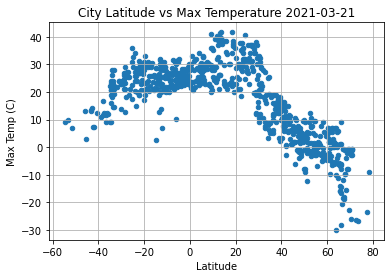

('This code shows the relationship between max temperatures and latitude. As '
 'the latitude moves away from 0 (ie. the equator) the Max temperature '
 'decreases. The plot indicates that there are on average more cities in the '
 'far northern reaches of the northern hemisphere')


<Figure size 432x288 with 0 Axes>

In [10]:
clean_city_data.plot(kind = "scatter", x="Latitude", y="Max Temp")
plt.title(f"City Latitude vs Max Temperature " + datetime.today().strftime('%Y-%m-%d'))
plt.grid()
plt.ylabel("Max Temp (C)")
plt.show()
plt.savefig("Latitude vs. Temperature Plot.png")

pprint("This code shows the relationship between max temperatures and latitude. As the latitude moves away from 0 (ie. the equator) the Max temperature decreases. The plot indicates that there are on average more cities in the far northern reaches of the northern hemisphere")

## Latitude vs. Humidity Plot

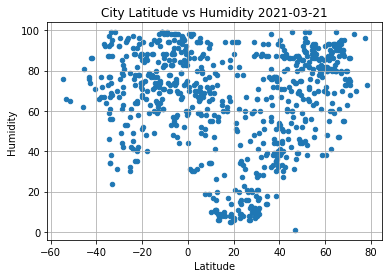

('This code shows the relationship between max temperatures and humidity. '
 'There does not seem to be a any relationship here, as one may expect the '
 'humidity to be higher the closer one is to the equator (lat = 0)')


<Figure size 432x288 with 0 Axes>

In [12]:
clean_city_data.plot(kind = "scatter", x="Latitude", y="Humidity")
plt.title(f"City Latitude vs Humidity " + datetime.today().strftime('%Y-%m-%d'))
plt.grid()
plt.ylabel("Humidity")
plt.show()
plt.savefig("Latitude vs. Humidity Plot.png")
pprint("This code shows the relationship between max temperatures and humidity. There does not seem to be a any relationship here, as one may expect the humidity to be higher the closer one is to the equator (lat = 0)")

## Latitude vs. Cloudiness Plot

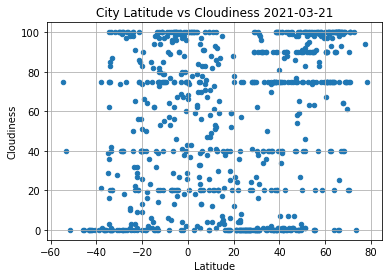

('This code shows the relationship between latitude and cloudiness. There is '
 'no relationship found here, indicating that latitude has no effect on how '
 'cloudy it might be')


<Figure size 432x288 with 0 Axes>

In [13]:
clean_city_data.plot(kind = "scatter", x="Latitude", y="Cloudiness")
plt.title(f"City Latitude vs Cloudiness " + datetime.today().strftime('%Y-%m-%d'))
plt.grid()
plt.ylabel("Cloudiness")
plt.show()
plt.savefig("Latitude vs. Cloudiness Plot.png")
pprint("This code shows the relationship between latitude and cloudiness. There is no relationship found here, indicating that latitude has no effect on how cloudy it might be")

## Latitude vs. Wind Speed Plot

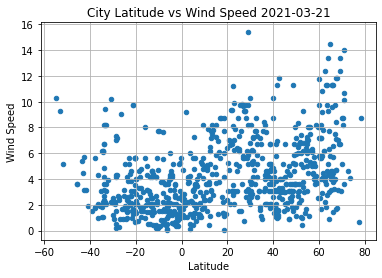

('This code shows the relationship between latitude and wind speed. There '
 'seems to be a slight tendency for cities further from the equator to have '
 'higher wind speeds on average particularly towards the northern hemisphere '
 'but this again may be the result of more cities present in the far northern '
 'hemisphere')


<Figure size 432x288 with 0 Axes>

In [14]:
clean_city_data.plot(kind = "scatter", x="Latitude", y="Wind Speed")
plt.title(f"City Latitude vs Wind Speed " + datetime.today().strftime('%Y-%m-%d'))
plt.grid()
plt.ylabel("Wind Speed")
plt.show()
plt.savefig("Latitude vs. Wind Speed Plot.png")
pprint("This code shows the relationship between latitude and wind speed. There seems to be a slight tendency for cities further from the equator to have higher wind speeds on average particularly towards the northern hemisphere but this again may be the result of more cities present in the far northern hemisphere")

## Linear Regression

In [15]:
north_hem = clean_city_data.loc[clean_city_data["Latitude"] > 0]

south_hem = clean_city_data.loc[clean_city_data["Latitude"] < 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

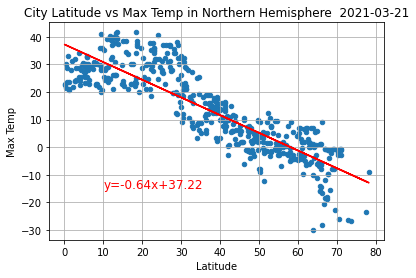

The r-value is 0.7544525882871146
('There is a fairly strong relationship between max temperature and latitude '
 'in the northern hemisphere. As one moves away from the equator the '
 'temperature tends to decrease')


In [18]:
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(north_hem["Latitude"], north_hem["Max Temp"])

regress_values = north_hem["Latitude"] * slope + intercept
line_eq = "y=" + str(round(slope, 2)) + "x+" + str(round(intercept, 2))

north_hem.plot(kind = "scatter", x="Latitude", y="Max Temp")
plt.plot(north_hem["Latitude"], regress_values, "r-")
plt.title(f"City Latitude vs Max Temp in Northern Hemisphere  " + datetime.today().strftime('%Y-%m-%d'))
plt.grid()
plt.annotate(line_eq, (10, -15), fontsize=12, color = "red")
plt.show()
print(f"The r-value is {rvalue**2}")
pprint("There is a fairly strong relationship between max temperature and latitude in the northern hemisphere. As one moves away from the equator the temperature tends to decrease")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

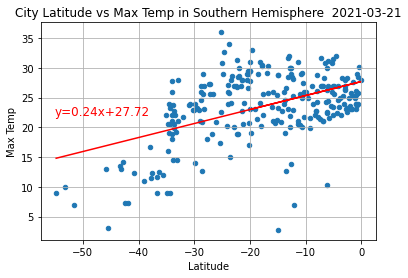

The r-value is 0.23859187137569293
('There is a fairly weak relationship between max temperature and latitude in '
 'the southern hemisphere. As one moves away from the equator the temperature '
 "tends to decrease very slightly, but as we can see there isn't a lot of data "
 'as there are not many cities found in the southern areas of the southern '
 'hemisphere')


In [33]:
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(south_hem["Latitude"], south_hem["Max Temp"])

regress_values = south_hem["Latitude"] * slope + intercept
line_eq = "y=" + str(round(slope, 2)) + "x+" + str(round(intercept, 2))

south_hem.plot(kind = "scatter", x="Latitude", y="Max Temp")
plt.plot(south_hem["Latitude"], regress_values, "r-")
plt.title(f"City Latitude vs Max Temp in Southern Hemisphere  " + datetime.today().strftime('%Y-%m-%d'))
plt.grid()
plt.annotate(line_eq, (-55, 22), fontsize=12, color = "red")
plt.show()
print(f"The r-value is {rvalue**2}")
pprint("There is a fairly weak relationship between max temperature and latitude in the southern hemisphere. As one moves away from the equator the temperature tends to decrease very slightly, but as we can see there isn't a lot of data as there are not many cities found in the southern areas of the southern hemisphere")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

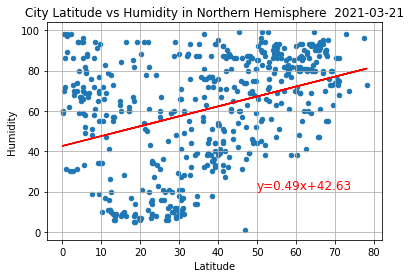

The r-value is 0.1340282621317436
('There is little to no relationship between Humidity and Latitude in the '
 'northern hemisphere. Oddly it tends towards a higher humidity the further '
 'you move away from the equator whic his unexpected')


In [23]:
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(north_hem["Latitude"], north_hem["Humidity"])

regress_values = north_hem["Latitude"] * slope + intercept
line_eq = "y=" + str(round(slope, 2)) + "x+" + str(round(intercept, 2))

north_hem.plot(kind = "scatter", x="Latitude", y="Humidity")
plt.plot(north_hem["Latitude"], regress_values, "r-")
plt.title(f"City Latitude vs Humidity in Northern Hemisphere  " + datetime.today().strftime('%Y-%m-%d'))
plt.grid()
plt.annotate(line_eq, (50, 21), fontsize=12, color = "red")
plt.show()
print(f"The r-value is {rvalue**2}")
pprint("There is little to no relationship between Humidity and Latitude in the northern hemisphere. Oddly it tends towards a higher humidity the further you move away from the equator whic his unexpected")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

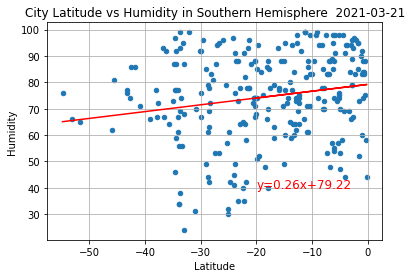

The r-value is 0.03534546414498951
('There is little to no relationship between Humidity and Latitude in the '
 'northern or southern hemisphere. This may indicate that heat does not always '
 'bring humidity')


In [26]:
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(south_hem["Latitude"], south_hem["Humidity"])

regress_values = south_hem["Latitude"] * slope + intercept
line_eq = "y=" + str(round(slope, 2)) + "x+" + str(round(intercept, 2))

south_hem.plot(kind = "scatter", x="Latitude", y="Humidity")
plt.plot(south_hem["Latitude"], regress_values, "r-")
plt.title(f"City Latitude vs Humidity in Southern Hemisphere  " + datetime.today().strftime('%Y-%m-%d'))
plt.grid()
plt.annotate(line_eq, (-20, 40), fontsize=12, color = "red")
plt.show()
print(f"The r-value is {rvalue**2}")
pprint("There is little to no relationship between Humidity and Latitude in the northern or southern hemisphere. This may indicate that heat does not always bring humidity")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

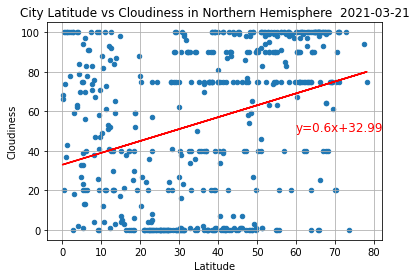

The r-value is 0.10111568262027357
('There is little to no relationship between cloudiness and latitude in the '
 'northern hemisphere.')


In [36]:
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(north_hem["Latitude"], north_hem["Cloudiness"])

regress_values = north_hem["Latitude"] * slope + intercept
line_eq = "y=" + str(round(slope, 2)) + "x+" + str(round(intercept, 2))

north_hem.plot(kind = "scatter", x="Latitude", y="Cloudiness")
plt.plot(north_hem["Latitude"], regress_values, "r-")
plt.title(f"City Latitude vs Cloudiness in Northern Hemisphere  " + datetime.today().strftime('%Y-%m-%d'))
plt.grid()
plt.annotate(line_eq, (60, 50), fontsize=12, color = "red")
plt.show()
print(f"The r-value is {rvalue**2}")
pprint("There is little to no relationship between cloudiness and latitude in the northern hemisphere.")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

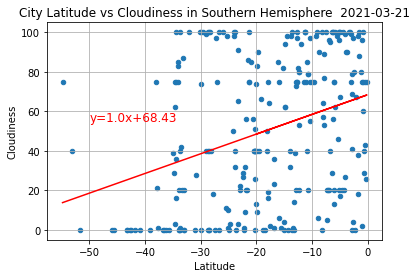

The r-value is 0.106370856061481
('There is little to no relationship between cloudiness and latitude in the '
 'southern hemisphere. Evidently for both hemispheres cloudiness is not '
 'indicative of whereabouts')


In [30]:
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(south_hem["Latitude"], south_hem["Cloudiness"])

regress_values = south_hem["Latitude"] * slope + intercept
line_eq = "y=" + str(round(slope, 2)) + "x+" + str(round(intercept, 2))

south_hem.plot(kind = "scatter", x="Latitude", y="Cloudiness")
plt.plot(south_hem["Latitude"], regress_values, "r-")
plt.title(f"City Latitude vs Cloudiness in Southern Hemisphere  " + datetime.today().strftime('%Y-%m-%d'))
plt.grid()
plt.annotate(line_eq, (-50, 55), fontsize=12, color = "red")
plt.show()
print(f"The r-value is {rvalue**2}")
pprint("There is little to no relationship between cloudiness and latitude in the southern hemisphere. Evidently for both hemispheres cloudiness is not indicative of whereabouts")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

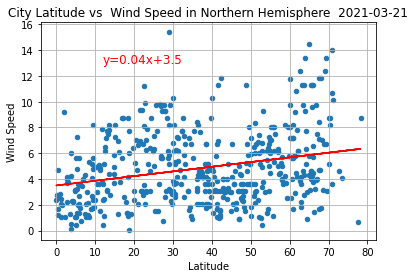

The r-value is 0.07075716098699128
('There is no relationship between Wind Speed and Latitude. Wind speed may be '
 'determined by other factors like proximity to water')


In [32]:
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(north_hem["Latitude"], north_hem["Wind Speed"])

regress_values = north_hem["Latitude"] * slope + intercept
line_eq = "y=" + str(round(slope, 2)) + "x+" + str(round(intercept, 2))

north_hem.plot(kind = "scatter", x="Latitude", y="Wind Speed")
plt.plot(north_hem["Latitude"], regress_values, "r-")
plt.title(f"City Latitude vs  Wind Speed in Northern Hemisphere  " + datetime.today().strftime('%Y-%m-%d'))
plt.grid()
plt.annotate(line_eq, (12, 13), fontsize=12, color = "red")
plt.show()
print(f"The r-value is {rvalue**2}")
pprint("There is no relationship between Wind Speed and Latitude. Wind speed may be determined by other factors like proximity to water")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

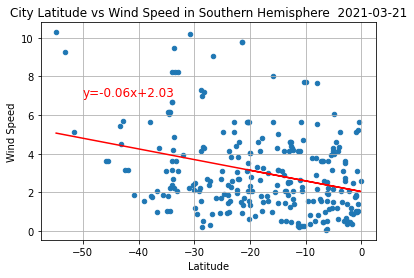

The r-value is 0.09822598181597805
('There is no relationship between Wind Speed and Latitude. Wind speed may be '
 'determined by other factors like proximity to water')


In [35]:
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(south_hem["Latitude"], south_hem["Wind Speed"])

regress_values = south_hem["Latitude"] * slope + intercept
line_eq = "y=" + str(round(slope, 2)) + "x+" + str(round(intercept, 2))

south_hem.plot(kind = "scatter", x="Latitude", y="Wind Speed")
plt.plot(south_hem["Latitude"], regress_values, "r-")
plt.title(f"City Latitude vs Wind Speed in Southern Hemisphere  " + datetime.today().strftime('%Y-%m-%d'))
plt.grid()
plt.annotate(line_eq, (-50, 7), fontsize=12, color = "red")
plt.show()
print(f"The r-value is {rvalue**2}")
pprint("There is no relationship between Wind Speed and Latitude. Wind speed may be determined by other factors like proximity to water")